In [1]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '4'
environ['maxsize']= '100000'
environ['batch_size']= str(4096*4)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MSE'
environ['layers'] = '300 200 120 100 80 50 30'
environ['dropouts'] = '0.3 0.2 0.2 0.1 0.1 0.05 0.05'
import torch
torch.cuda.set_device(1)
%run utils.ipynb

l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}") 

In [2]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


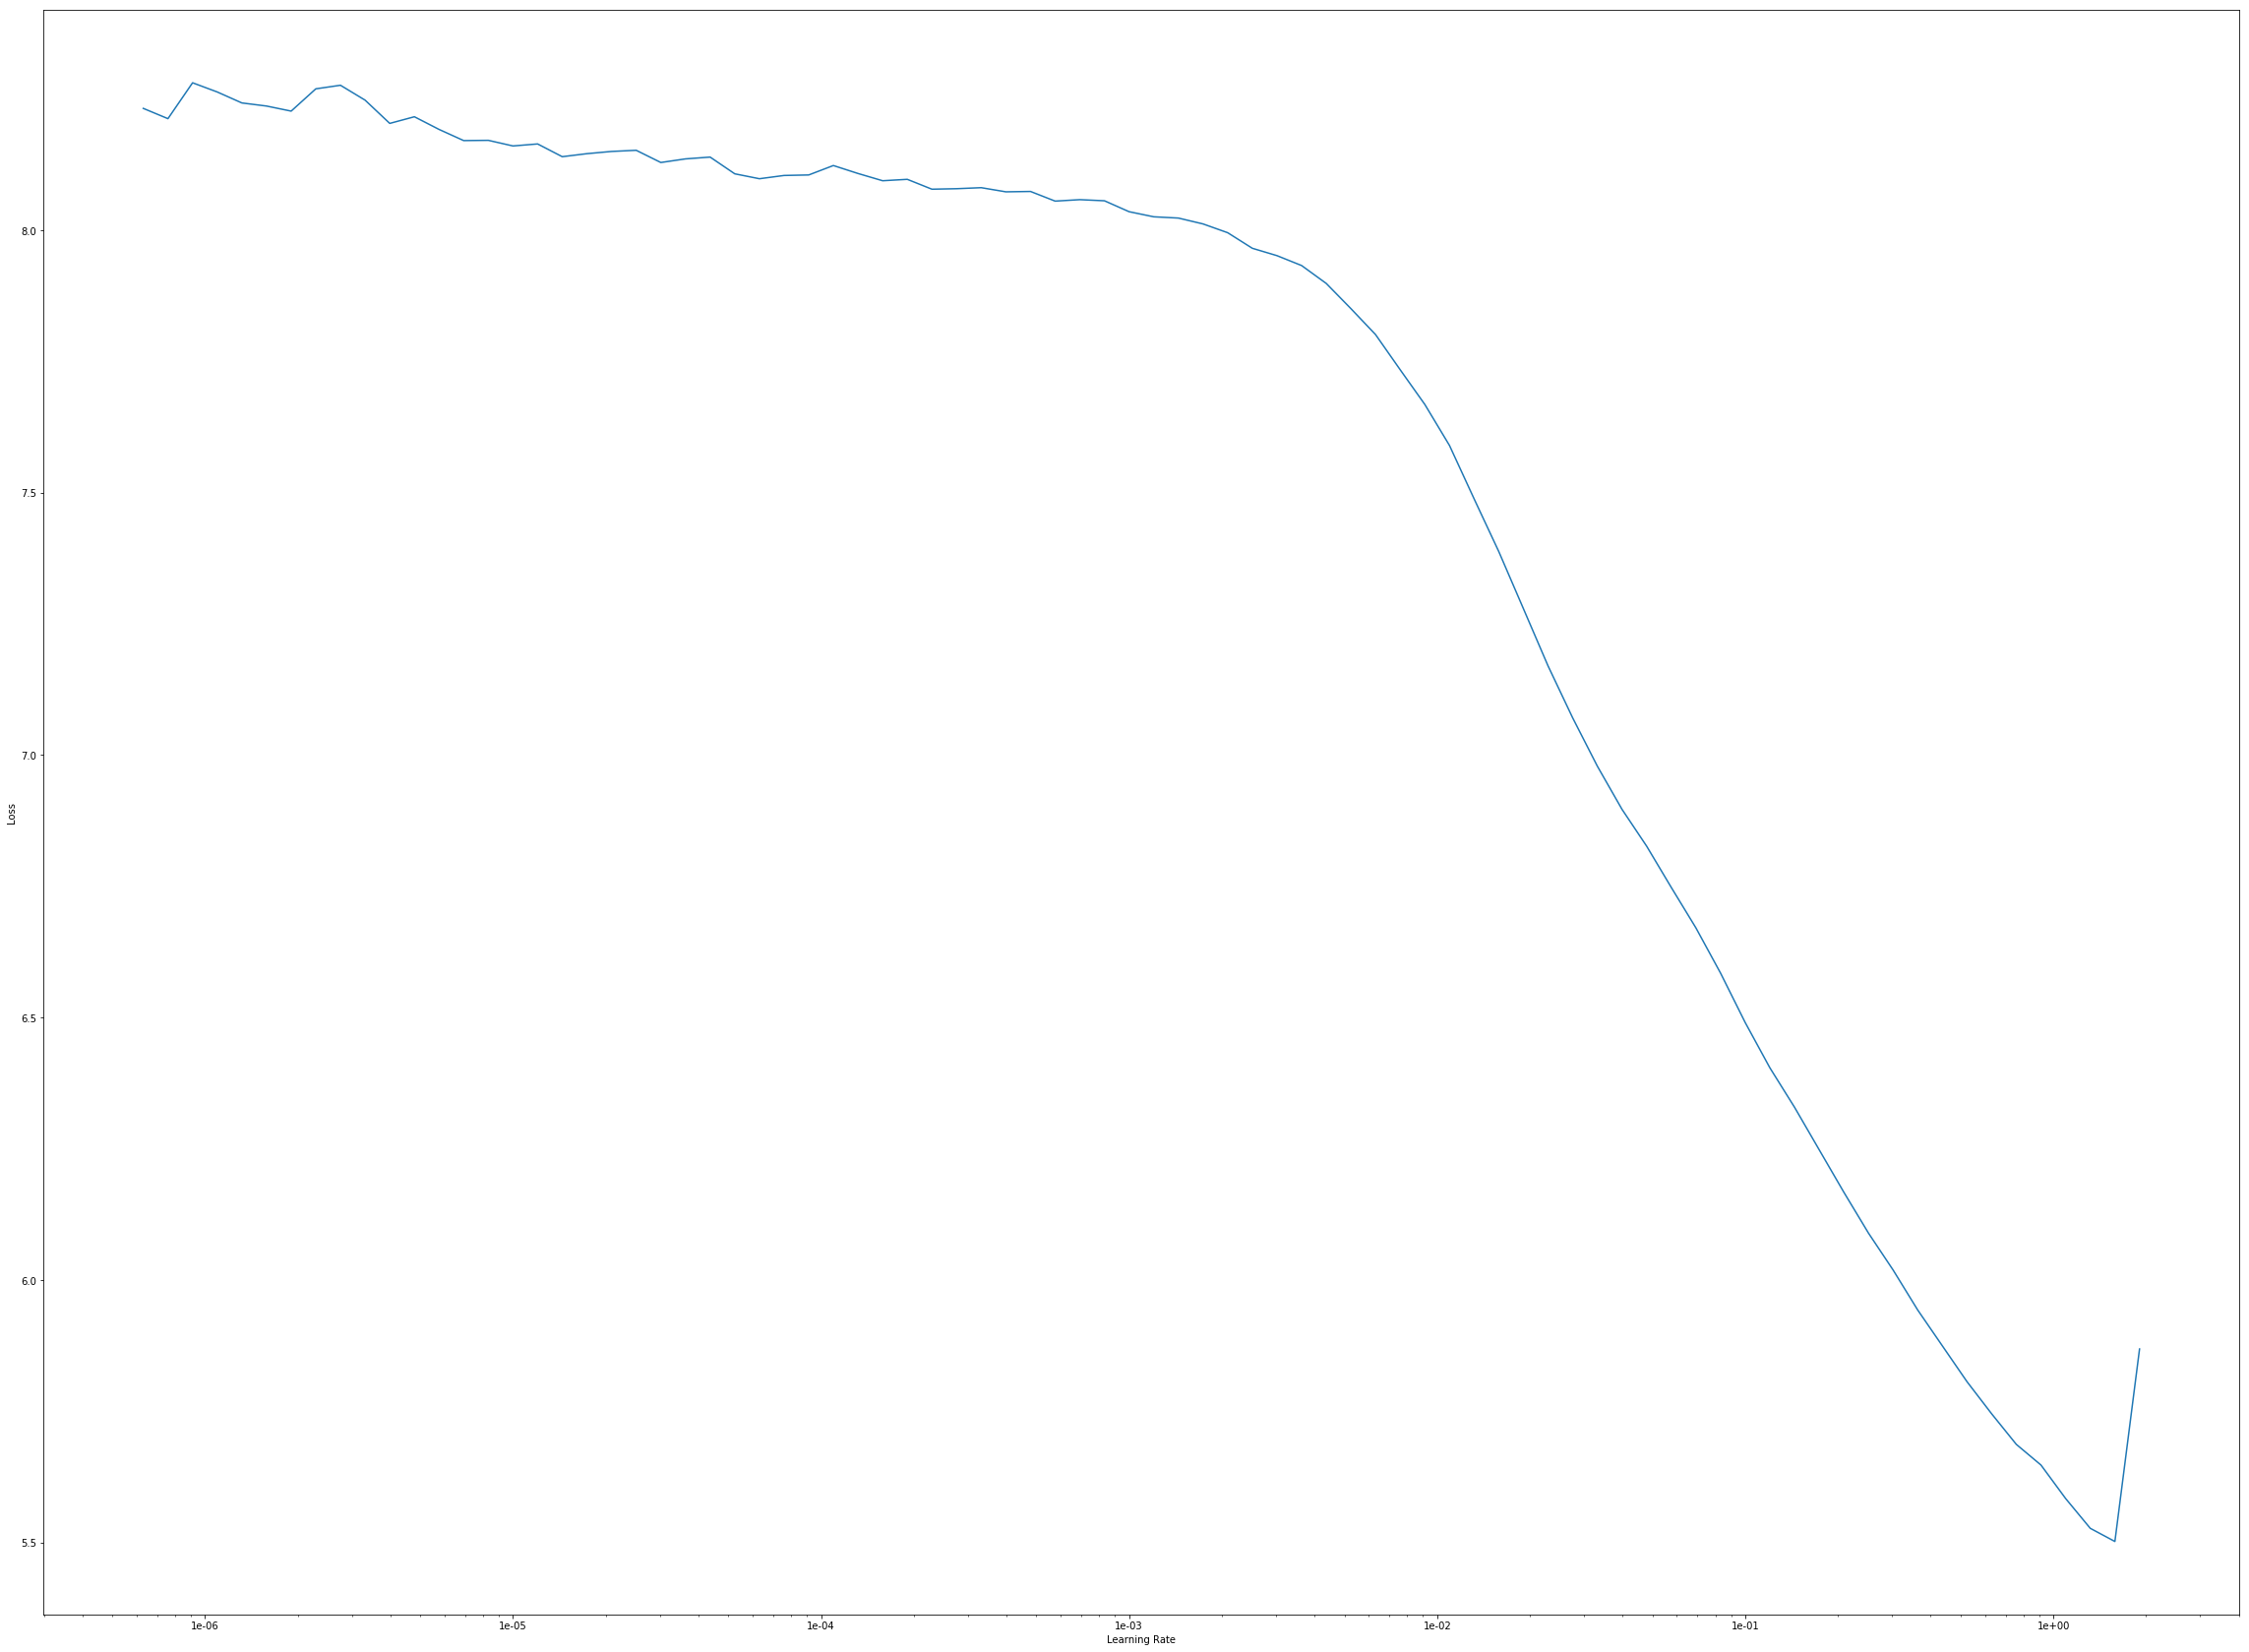

In [17]:
l.recorder.plot()

In [5]:
lr = 1e-03

In [6]:
l.fit_one_cycle(1000, lr)

epoch,train_loss,valid_loss
1,1.073504,1.197530
2,1.071029,1.213155
3,1.072515,1.215354
4,1.075683,1.207393
5,1.077332,1.213694
6,1.077715,1.216813
7,1.077571,1.214774
8,1.075742,1.210634
9,1.074458,1.216026
10,1.074728,1.222983


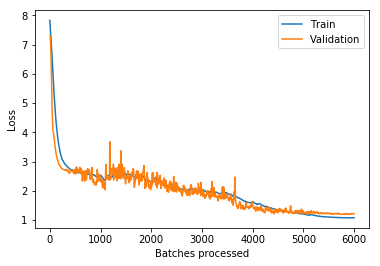

In [4]:
l.recorder.plot_losses()

In [14]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}")

In [10]:
val_df = pd.DataFrame()
train_df = pd.DataFrame()

preds, targets = l.get_preds(fai.basic_data.DatasetType.Valid)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

val_df['prediction'] = preds
val_df['target'] = targets
val_df['abs_diff'] = np.abs(preds - targets)
val_df['APE'] = np.abs(val_df.target - val_df.prediction)/val_df.target * 100

preds, targets = l.get_preds(fai.basic_data.DatasetType.Train)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

train_df['prediction'] = preds
train_df['target'] = targets
train_df['abs_diff'] = np.abs(preds - targets)
train_df['APE'] = np.abs(train_df.target - train_df.prediction)/train_df.target * 100

In [11]:
val_df.describe()

,prediction,target,abs_diff,APE
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.125660,2.027997,0.478604,55.945557
std,1.727538,1.919018,0.584464,113.525436
min,0.125330,0.030862,0.000022,0.000936
25%,0.896762,0.652639,0.126763,8.565076
50%,1.591264,1.392690,0.280744,20.923521
75%,2.803258,2.590816,0.591900,46.658999
max,10.828941,13.272740,5.599267,2309.435547


/data/scratch/henni-mohammed/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


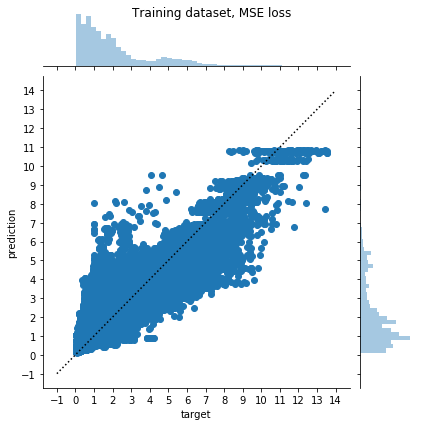

In [12]:
joint_plot(train_df, f"Training dataset, {loss_func} loss")

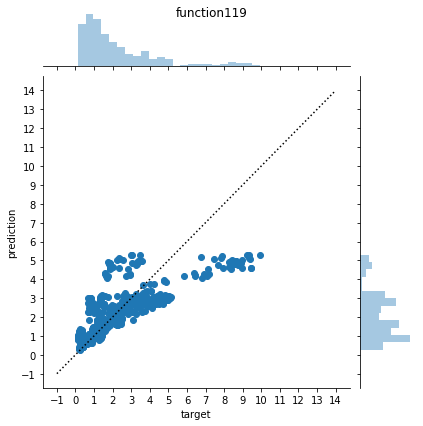

In [13]:
joint_plot_one_program(val_dl, 'function119', l.model)